In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Movie_Recommendation_System").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Movie_Recommendation_System>

In [2]:
import socket
import platform

# Get computer name
computer_name = socket.gethostname()

# Get IP address
ip_address = socket.gethostbyname(computer_name)

# Get computer configuration
computer_config = platform.uname()

print(f"Computer Name: {computer_name}")
print(f"IP Address: {ip_address}")
print(f"Computer Configuration: {computer_config}")

Computer Name: MSI
IP Address: 192.168.1.13
Computer Configuration: uname_result(system='Windows', node='MSI', release='10', version='10.0.19041', machine='AMD64', processor='Intel64 Family 6 Model 141 Stepping 1, GenuineIntel')


In [3]:
movie_data = sc.textFile("movies.txt")
movie_data.first()
movie_data.take(5)

['tt1745960,Top Gun: Maverick,"[\'Action\', \'Drama\']",2022',
 'tt8041270,Jurassic World Dominion,"[\'Action\', \'Adventure\', \'Sci-Fi\']",2022',
 'tt0092099,Top Gun,"[\'Action\', \'Drama\']",1986',
 'tt9783600,Spiderhead,"[\'Action\', \'Crime\', \'Drama\']",2022',
 'tt6710474,Everything Everywhere All at Once,"[\'Action\', \'Adventure\', \'Comedy\']",2022']

In [4]:
num_movies = movie_data.count()
print("Number of movies: ", num_movies)

Number of movies:  2201


In [5]:
years = movie_data.map(lambda x: x.split(",")[-1])
print("Years: ", years.take(10))

Years:  ['2022', '2022', '1986', '2022', '2022', '2022', 'TV Series', '2022', '1993', '2022']


In [6]:
years = years.filter(lambda x: x.isdigit())
movie_age = years.map(lambda x: 2024 - int(x)).countByValue()
print("Movie Age: ", movie_age)
values = list(movie_age.values())
bins = list(movie_age.keys())
print("Values: ", values)
print("Bins: ", bins)

Movie Age:  defaultdict(<class 'int'>, {2: 44, 38: 29, 31: 30, 3: 52, 9: 53, 6: 91, 27: 51, 40: 32, 23: 40, 47: 8, 5: 90, 21: 46, 28: 33, 25: 20, 16: 51, 7: 81, 14: 51, 19: 43, 1: 22, 35: 31, 13: 62, 29: 35, 15: 54, 10: 62, 24: 28, 22: 40, 4: 50, 41: 20, 12: 60, 11: 57, 36: 26, 18: 41, 8: 81, 42: 14, 37: 23, 17: 45, 33: 22, 20: 39, 30: 29, 26: 35, 34: 38, 32: 23, 46: 12, 62: 3, 48: 6, 45: 9, 44: 14, 39: 28, 60: 2, 43: 12, 56: 5, 53: 10, 50: 16, 65: 1, 51: 14, 61: 3, 59: 4, 55: 5, 89: 1, 57: 7, 52: 5, 63: 2, 109: 1, 58: 7, 71: 2, 49: 9, 54: 3, 87: 2, 72: 2, 86: 1, 64: 1, 92: 3, 70: 3, 75: 3, 98: 1, 76: 1, 66: 3, 74: 1, 0: 1, 67: 3, 73: 1, 84: 3, 100: 1, 90: 1, 97: 1, 82: 1, 69: 1})
Values:  [44, 29, 30, 52, 53, 91, 51, 32, 40, 8, 90, 46, 33, 20, 51, 81, 51, 43, 22, 31, 62, 35, 54, 62, 28, 40, 50, 20, 60, 57, 26, 41, 81, 14, 23, 45, 22, 39, 29, 35, 38, 23, 12, 3, 6, 9, 14, 28, 2, 12, 5, 10, 16, 1, 14, 3, 4, 5, 1, 7, 5, 2, 1, 7, 2, 9, 3, 2, 2, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

bins =np.sort(bins)
print("Bins: ", bins)

Bins:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  69  70  71  72
  73  74  75  76  82  84  86  87  89  90  92  97  98 100 109]


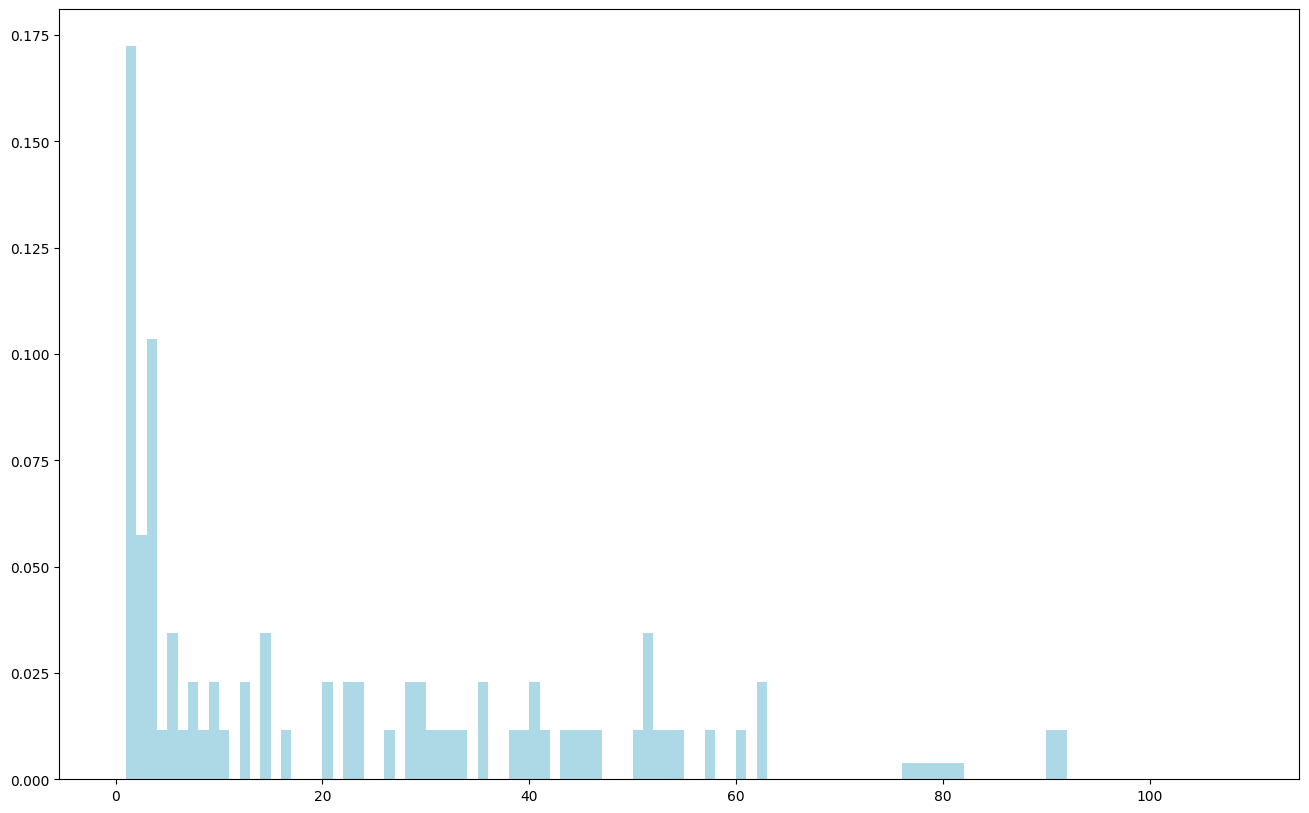

In [8]:
plt.hist(values, bins=bins, color='lightblue',density=True)
fig = plt.gcf()
fig.set_size_inches(16, 10)

In [9]:
ratings_data = sc.textFile("users.txt")
ratings_data.count()

50573

In [10]:
ratings_data.first()

'ur82692553,pucciarello,rw8183145,tt1745960,9'

In [11]:
ratings_data = ratings_data.map(lambda x: x.split(","))
ratings_data.take(5)

[['ur82692553', 'pucciarello', 'rw8183145', 'tt1745960', '9'],
 ['ur93656484', 'nihal-38544', 'rw8173474', 'tt1745960', '9'],
 ['ur49400835', 'r96sk', 'rw8174934', 'tt1745960', '9'],
 ['ur82936063', 'scottedwards-87359', 'rw8177338', 'tt1745960', '10'],
 ['ur83295852', 'lovefalloutkindagamer', 'rw8177954', 'tt1745960', '10']]

In [12]:

ratings = ratings_data.map(lambda x: int(x[4]))

print("Ratings: ", ratings.take(10))


Ratings:  [9, 9, 9, 10, 10, 10, 10, 10, 10, 7]


In [13]:
avr_rating = ratings.reduce(lambda x, y: x + y) / ratings.count()
print("Average Rating: ", avr_rating)

Average Rating:  6.096869871275186


In [14]:
ratings_list = ratings.collect()
print("Ratings List: ", ratings_list)

Ratings List:  [9, 9, 9, 10, 10, 10, 10, 10, 10, 7, 10, 6, 10, 10, 9, 9, 10, 10, 6, 8, 7, 5, 10, 10, 10, 6, 5, 5, 6, 6, 2, 6, 1, 7, 3, 8, 7, 3, 7, 7, 2, 6, 4, 6, 2, 8, 7, 2, 7, 7, 8, 7, 6, 7, 9, 7, 9, 6, 8, 7, 7, 6, 7, 9, 6, 10, 7, 8, 7, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5, 8, 7, 4, 7, 6, 3, 6, 1, 7, 2, 10, 6, 3, 7, 7, 9, 9, 9, 10, 10, 9, 8, 6, 10, 6, 9, 6, 10, 9, 10, 9, 6, 10, 6, 10, 6, 2, 9, 5, 7, 5, 7, 6, 3, 8, 7, 3, 9, 7, 4, 7, 6, 6, 3, 8, 6, 3, 8, 6, 4, 6, 6, 10, 6, 5, 7, 6, 6, 6, 2, 8, 7, 5, 8, 6, 2, 6, 7, 6, 5, 8, 7, 4, 9, 6, 5, 7, 9, 9, 9, 10, 10, 10, 10, 10, 10, 7, 9, 7, 4, 9, 10, 10, 9, 10, 8, 7, 10, 7, 4, 7, 6, 6, 6, 7, 8, 6, 9, 6, 5, 8, 6, 2, 6, 6, 8, 7, 8, 7, 4, 8, 7, 4, 7, 6, 7, 8, 8, 6, 10, 7, 8, 6, 9, 7, 8, 6, 4, 6, 8, 7, 9, 6, 9, 7, 10, 6, 5, 7, 9, 8, 7, 10, 10, 9, 6, 10, 6, 10, 6, 5, 10, 9, 8, 6, 10, 6, 10, 6, 3, 10, 10, 10, 10, 7, 7, 7, 6, 6, 7, 10, 7, 10, 6, 8, 6, 4, 6, 6, 6, 9, 6, 10, 6, 10, 6, 3, 6, 5, 5, 5, 7, 6, 7, 4, 8, 7, 1, 10, 7, 3, 7, 7, 7, 1, 10, 7, 1, 9, 7, 5, 7

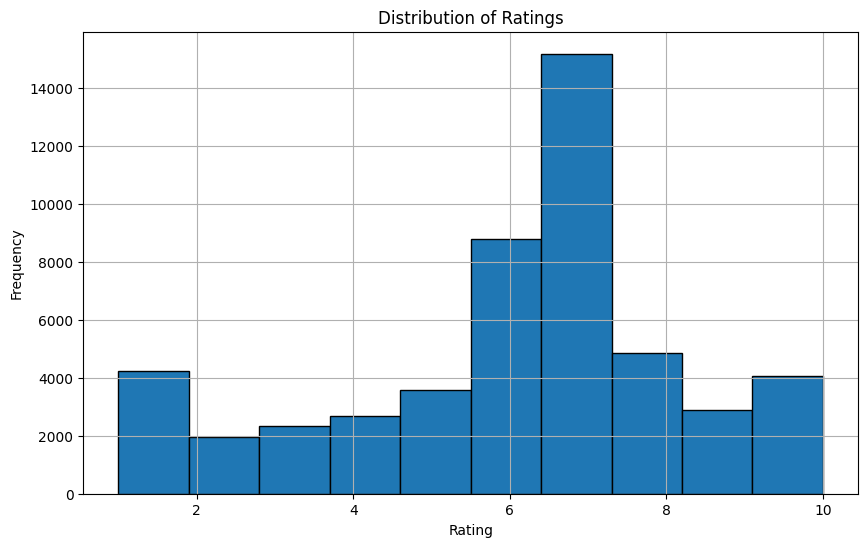

In [15]:
# Matplotlib ile histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(ratings_list, bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
data = spark.read.csv("imdb_users_ratings_2500.csv", header=True, inferSchema=True)

In [17]:
data.show(5)

+---------+-----------------+-------------------+------------+--------------------+----------+---------+------+
| Movie ID|      Movie Title|              Genre|Release Year|           User Name|   User ID|Review ID|Rating|
+---------+-----------------+-------------------+------------+--------------------+----------+---------+------+
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|         pucciarello|ur82692553|rw8183145|     9|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|         nihal-38544|ur93656484|rw8173474|     9|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|               r96sk|ur49400835|rw8174934|     9|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|  scottedwards-87359|ur82936063|rw8177338|    10|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|lovefalloutkindag...|ur83295852|rw8177954|    10|
+---------+-----------------+-------------------+------------+--------------------+----------+---------+

In [18]:
groupby_data=data.groupBy("Movie ID")

In [19]:
from pyspark.sql.functions import col, desc


groupby_sorted_data=groupby_data.agg({"Rating":"mean"}).orderBy(desc("avg(Rating)"))
popular=groupby_sorted_data.groupBy("avg(Rating)").count()
popular=popular.orderBy(desc("avg(Rating)"))
popular.show(10)
groupby_sorted_data.show(10)

+-----------------+-----+
|      avg(Rating)|count|
+-----------------+-----+
|             10.0|    3|
|             9.65|    1|
|              9.5|    1|
|9.304347826086957|    1|
|9.181818181818182|    1|
|9.173913043478262|    2|
|9.083333333333334|    1|
|              9.0|    3|
|             8.96|    2|
|8.869565217391305|    1|
+-----------------+-----+
only showing top 10 rows

+---------+-----------------+
| Movie ID|      avg(Rating)|
+---------+-----------------+
|tt1113851|             10.0|
|tt1273198|             10.0|
|tt1031445|             10.0|
|tt6019206|             9.65|
|tt5674658|              9.5|
|tt0167260|9.304347826086957|
|tt0133093|9.181818181818182|
|tt0120737|9.173913043478262|
|tt0103064|9.173913043478262|
|tt0468569|9.083333333333334|
+---------+-----------------+
only showing top 10 rows



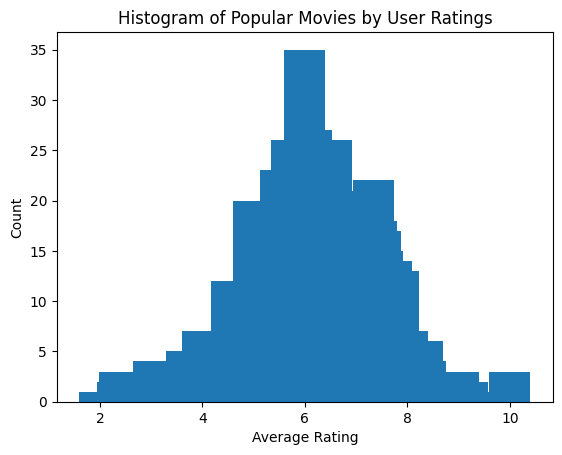

In [20]:
import matplotlib.pyplot as plt

# Extract the ratings and counts from the DataFrame
ratings = popular.select("avg(Rating)").rdd.flatMap(lambda x: x).collect()
counts = popular.select("count").rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.bar(ratings, counts)
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Histogram of Popular Movies by User Ratings")
plt.show()

In [21]:
from pyspark.sql.functions import create_map, lit
from itertools import chain

# Create mappings
movie_id_mapping = {id: idx for idx, id in enumerate(data.select('Movie ID').distinct().rdd.flatMap(lambda x: x).collect(), start=1)}
user_id_mapping = {id: idx for idx, id in enumerate(data.select('User ID').distinct().rdd.flatMap(lambda x: x).collect(), start=1)}

# Create map for replacement
mapping_expr_movie = create_map([lit(x) for x in chain(*movie_id_mapping.items())])
mapping_expr_user = create_map([lit(x) for x in chain(*user_id_mapping.items())])

# Apply mappings
data = data.withColumn('Movie ID', mapping_expr_movie.getItem(col('Movie ID')))
data = data.withColumn('User ID', mapping_expr_user.getItem(col('User ID')))

# Display the updated DataFrame
data.show(5)

+--------+-----------------+-------------------+------------+--------------------+-------+---------+------+
|Movie ID|      Movie Title|              Genre|Release Year|           User Name|User ID|Review ID|Rating|
+--------+-----------------+-------------------+------------+--------------------+-------+---------+------+
|     438|Top Gun: Maverick|['Action', 'Drama']|        2022|         pucciarello|  25401|rw8183145|     9|
|     438|Top Gun: Maverick|['Action', 'Drama']|        2022|         nihal-38544|  18984|rw8173474|     9|
|     438|Top Gun: Maverick|['Action', 'Drama']|        2022|               r96sk|   8766|rw8174934|     9|
|     438|Top Gun: Maverick|['Action', 'Drama']|        2022|  scottedwards-87359|   4616|rw8177338|    10|
|     438|Top Gun: Maverick|['Action', 'Drama']|        2022|lovefalloutkindag...|   2271|rw8177954|    10|
+--------+-----------------+-------------------+------------+--------------------+-------+---------+------+
only showing top 5 rows



In [22]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator


# Split the data into train and test sets
train, test = data.randomSplit([0.7, 0.3], seed=5020) 

# Define ALS model
als = ALS(userCol="User ID", itemCol="Movie ID", ratingCol="Rating", coldStartStrategy="drop")

# Initialize evaluators
rmse_evaluator = RegressionEvaluator(metricName="rmse", labelCol="Rating", predictionCol="prediction")
mse_evaluator = RegressionEvaluator(metricName="mse", labelCol="Rating", predictionCol="prediction")

# Manually set and evaluate parameters
parameters = [
    {"rank": 10, "maxIter": 10, "lambda": 0.01},
    {"rank": 10, "maxIter": 10, "lambda": 0.1},
    {"rank": 50, "maxIter": 10, "lambda": 0.01},
    {"rank": 50, "maxIter": 10, "lambda": 0.1},
    {"rank": 200, "maxIter": 10, "lambda": 0.01},
    {"rank": 200, "maxIter": 10, "lambda": 0.1},

    {"rank": 10, "maxIter": 15, "lambda": 0.01},
    {"rank": 10, "maxIter": 15, "lambda": 0.1},
    {"rank": 50, "maxIter": 15, "lambda": 0.01},
    {"rank": 50, "maxIter": 15, "lambda": 0.1},
    {"rank": 200, "maxIter": 15, "lambda": 0.01},
    {"rank": 200, "maxIter": 15, "lambda": 0.1},

    {"rank": 10, "maxIter": 17, "lambda": 0.01},
    {"rank": 10, "maxIter": 17, "lambda": 0.1},
    {"rank": 50, "maxIter": 17, "lambda": 0.01},
    {"rank": 50, "maxIter": 17, "lambda": 0.1},
    {"rank": 200, "maxIter": 17, "lambda": 0.01},
    {"rank": 200, "maxIter": 17, "lambda": 0.1},
     
]

best_model = None
best_rmse = float("inf")
best_mse = float("inf")

for params in parameters:
    als.setParams(rank=params["rank"], maxIter=params["maxIter"], regParam=params["lambda"])
    model = als.fit(train)
    predictions = model.transform(test)
    rmse = rmse_evaluator.evaluate(predictions)
    mse = mse_evaluator.evaluate(predictions)
    print(f"Model with rank={params['rank']}, maxIter={params['maxIter']}, regParam={params['lambda']} has RMSE={rmse} and MSE={mse}")
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_mse = mse

print(f"Best model has RMSE={best_rmse} and MSE={best_mse}")

Model with rank=10, maxIter=10, regParam=0.01 has RMSE=6.209097053825173 and MSE=38.552886223820444
Model with rank=10, maxIter=10, regParam=0.1 has RMSE=2.7767996234729244 and MSE=7.710616148919378
Model with rank=50, maxIter=10, regParam=0.01 has RMSE=3.765024072344341 and MSE=14.175406265332366
Model with rank=50, maxIter=10, regParam=0.1 has RMSE=2.4794516000540563 and MSE=6.14768023701062
Model with rank=200, maxIter=10, regParam=0.01 has RMSE=3.122853246867966 and MSE=9.752212401473798
Model with rank=200, maxIter=10, regParam=0.1 has RMSE=2.3479195133570094 and MSE=5.512726041202615
Model with rank=10, maxIter=15, regParam=0.01 has RMSE=5.487484386430157 and MSE=30.11248489131475
Model with rank=10, maxIter=15, regParam=0.1 has RMSE=2.3289935930719627 and MSE=5.424211156570251
Model with rank=50, maxIter=15, regParam=0.01 has RMSE=3.2191907367339687 and MSE=10.363188999473794
Model with rank=50, maxIter=15, regParam=0.1 has RMSE=2.141408048366509 and MSE=4.585628429608862
Model 

In [23]:
# Make predictions
predictions = best_model.transform(test)

# Select the relevant columns for comparison
comparison = predictions.select("Rating", "prediction")

# Show side by side comparison
comparison.show()

+------+----------+
|Rating|prediction|
+------+----------+
|     6| 3.6737292|
|     4| 6.5946364|
|     6|  6.094174|
|     8|  6.246049|
|     2| 3.4022408|
|     2|0.19629101|
|     1| 3.5282393|
|     1| 1.2863126|
|     8|0.74852145|
|     7| 6.9163804|
|     7|  6.820549|
|     3| 2.9690351|
|     7|  6.927748|
|     6| 5.9156446|
|     6|  5.933589|
|     3| 3.3955724|
|     8|  7.827678|
|     9| 8.9071045|
|     6|  5.933181|
|     6|  5.962101|
+------+----------+
only showing top 20 rows



In [24]:
from pyspark.sql import functions as F

# Extract user and item factors directly
user_factors = best_model.userFactors.select("id", "features").rdd.map(lambda x: (x.id, x.features))
item_factors = best_model.itemFactors.select("id", "features").rdd.map(lambda x: (x.id, x.features))

# Define a function to calculate cosine similarity
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

# Define a function to find top N users who would like a specific movie
def top_users_for_movie(movie_id, num_users=10):
    # Get features for the given movie
    movie_features = item_factors.filter(lambda x: x[0] == movie_id).map(lambda x: x[1]).collect()[0]
    # Calculate cosine similarity between the given movie and all users
    user_similarities = user_factors.map(lambda x: (x[0], cosine_similarity(x[1], movie_features)))
    # Get the top N users with highest similarity
    top_users = user_similarities.sortBy(lambda x: -x[1]).take(num_users)
    return top_users

# Define a function to predict rating for a movie given by a user
def predict_rating(user_id, movie_id):
    user_features = user_factors.filter(lambda x: x[0] == user_id).map(lambda x: x[1]).collect()[0]
    item_features = item_factors.filter(lambda x: x[0] == movie_id).map(lambda x: x[1]).collect()[0]
    return np.dot(user_features, item_features)

# Get the name of the movie
movie_id = 438  # Replace with the actual movie ID
movie_name = data.select("Movie Title").where(data["Movie ID"] == movie_id).select(F.first("Movie Title")).collect()[0][0]

# Example: Find top 10 users who would like a specific movie and predict their ratings
top_users = top_users_for_movie(movie_id)
print(f"Top 10 users who would like the movie '{movie_name}':")
for user_id, similarity in top_users:
    rating_prediction = predict_rating(user_id, movie_id)
    print(f"User ID: {user_id}, Similarity: {similarity}, Predicted Rating: {rating_prediction}")


Top 10 users who would like the movie 'Top Gun: Maverick':
User ID: 13903, Similarity: 1.0, Predicted Rating: 4.976186821493158
User ID: 18583, Similarity: 1.0, Predicted Rating: 9.952373642986316
User ID: 1134, Similarity: 1.0, Predicted Rating: 9.952373642986316
User ID: 6577, Similarity: 1.0, Predicted Rating: 9.952373642986316
User ID: 15429, Similarity: 1.0, Predicted Rating: 9.952373642986316
User ID: 1000, Similarity: 0.9999999999999998, Predicted Rating: 8.957136307688742
User ID: 18984, Similarity: 0.9999999999999998, Predicted Rating: 8.957136307688742
User ID: 21382, Similarity: 0.9999999999999997, Predicted Rating: 5.9714241924942915
User ID: 2271, Similarity: 0.9905268841749818, Predicted Rating: 9.892577228520924
User ID: 16985, Similarity: 0.9340915680010773, Predicted Rating: 7.520270051548575


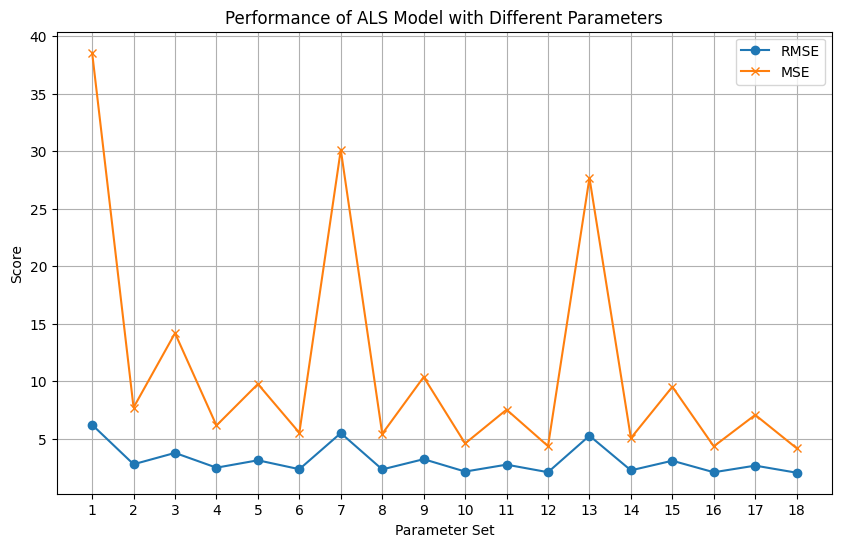

In [25]:
import matplotlib.pyplot as plt

# Farklı ALS parametrelerinin değerleri
parameters = [
    {"rank": 10, "maxIter": 10, "regParam": 0.01},
    {"rank": 10, "maxIter": 10, "regParam": 0.1},
    {"rank": 50, "maxIter": 10, "regParam": 0.01},
    {"rank": 50, "maxIter": 10, "regParam": 0.1},
    {"rank": 200, "maxIter": 10, "regParam": 0.01},
    {"rank": 200, "maxIter": 10, "regParam": 0.1},

    {"rank": 10, "maxIter": 15, "regParam": 0.01},
    {"rank": 10, "maxIter": 15, "regParam": 0.1},
    {"rank": 50, "maxIter": 15, "regParam": 0.01},
    {"rank": 50, "maxIter": 15, "regParam": 0.1},
    {"rank": 200, "maxIter": 15, "regParam": 0.01},
    {"rank": 200, "maxIter": 15, "regParam": 0.1},

    {"rank": 10, "maxIter": 17, "regParam": 0.01},
    {"rank": 10, "maxIter": 17, "regParam": 0.1},
    {"rank": 50, "maxIter": 17, "regParam": 0.01},
    {"rank": 50, "maxIter": 17, "regParam": 0.1},
    {"rank": 200, "maxIter": 17, "regParam": 0.01},
    {"rank": 200, "maxIter": 17, "regParam": 0.1},
    

]

# RMSE ve MSE değerlerini depolamak için boş listeler
rmse_values = []
mse_values = []

# Modelleri eğit ve performans ölçütlerini hesapla
for params in parameters:
    als.setParams(rank=params["rank"], maxIter=params["maxIter"], regParam=params["regParam"])
    model = als.fit(train)
    predictions = model.transform(test)
    rmse = rmse_evaluator.evaluate(predictions)
    mse = mse_evaluator.evaluate(predictions)
    rmse_values.append(rmse)
    mse_values.append(mse)

# Farklı parametre setleri için görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(parameters) + 1), rmse_values, marker='o', label='RMSE')
plt.plot(range(1, len(parameters) + 1), mse_values, marker='x', label='MSE')
plt.title('Performance of ALS Model with Different Parameters')
plt.xlabel('Parameter Set')
plt.ylabel('Score')
plt.xticks(range(1, len(parameters) + 1))
plt.legend()
plt.grid(True)
plt.show()